# Astro 9

# Lecture 2: Intro to Plotting

This lesson will introduce you to the skills you will likely use the most in your careers using python

In [1]:
#Like we learned on Tuesday you should always start your code with
import numpy as np

In [2]:
#Another line of code you will likely write everytime you begin a new notebook
import matplotlib.pyplot as plt

[]

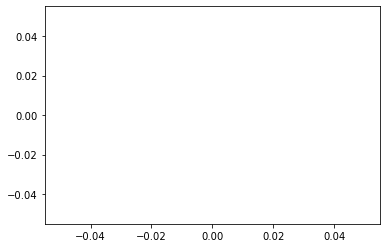

In [3]:
#Create a plot
plt.figure()
plt.plot()

Its empty though, so we've got to fill it with something

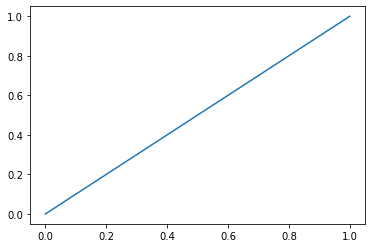

In [4]:
#Very useful function for making plots
x = np.linspace(0, 1, 100)
y = x

plt.figure()
plt.plot(x, y)

Not a very useful plot. Just shows a line. What can we do to make it more informative.

Text(0.5, 1.0, 'Plotting Tutorial')

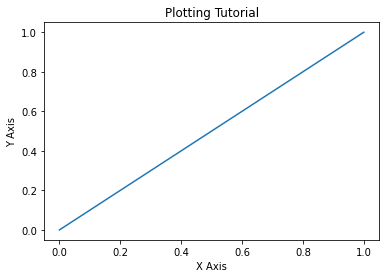

In [5]:
plt.figure()
plt.plot(x, y)
plt.xlabel('X Axis') #Making use of strings
plt.ylabel('Y Axis')
plt.title('Plotting Tutorial')

What if we want a scatter plot instead of a line plot?

Text(0.5, 1.0, 'Plotting Tutorial')

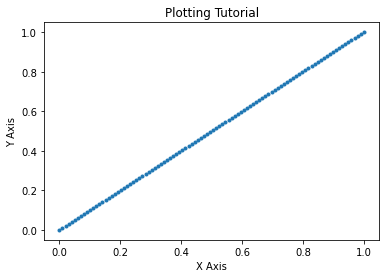

In [6]:
plt.figure()
plt.plot(x, y, '.') #letting python know how you want the data displayed
plt.xlabel('X Axis') 
plt.ylabel('Y Axis')
plt.title('Plotting Tutorial')

There are far more ways we can manipulate the aspects of plots to change how the information is displayed.

Text(0.5, 1.0, 'Plotting Tutorial')

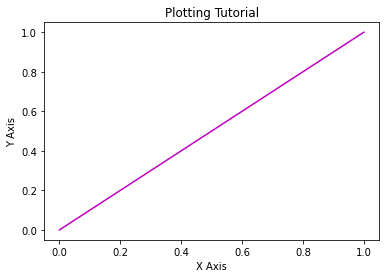

In [7]:
plt.figure()
#change the color
plt.plot(x, y, 'm')
plt.xlabel('X Axis') 
plt.ylabel('Y Axis')
plt.title('Plotting Tutorial')

Text(0.5, 1.0, 'Plotting Tutorial')

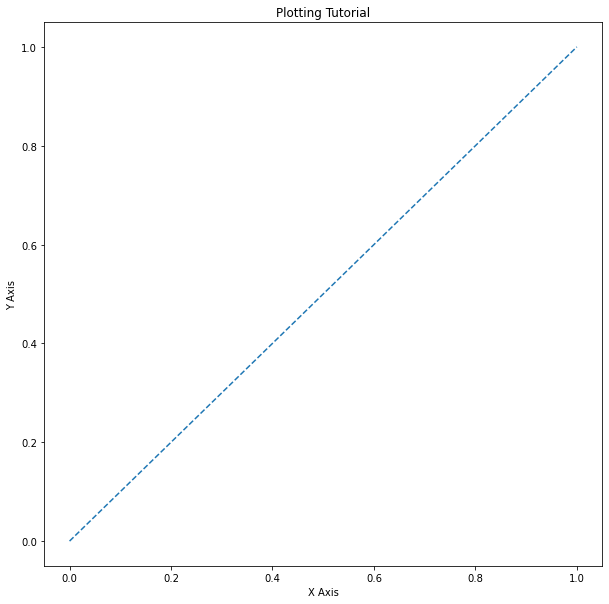

In [11]:
#change the size of the plot
plt.figure(figsize=(10,10))
plt.plot(x, y, '--') #more options for how to display the data
plt.xlabel('X Axis') #Making use of strings
plt.ylabel('Y Axis')
plt.title('Plotting Tutorial')

## Let's look at a more interesting example

### Sines and Cosines

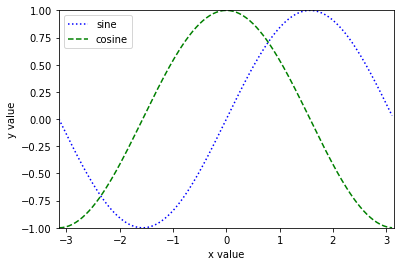

In [1]:
from pylab import * # import all functions from numpy, scipy, and matplotlib. Beware ! Overloads functions like sqrt, sin

# make plots inline
%matplotlib inline
x = arange(-pi, pi, pi/100)   # create an array of x values
plot(x, sin(x), 'b:', label='sine' )   # plot arrays x and sin(x), in blue, solid line
plot(x, cos(x), 'g--', label='cosine' )
xlabel('x value' )
ylabel('y value' )
xlim(-pi, pi)
ylim(-1, 1)
legend(loc='upper left')
show()

## Different Plot Options

### Line and Marker Attributes

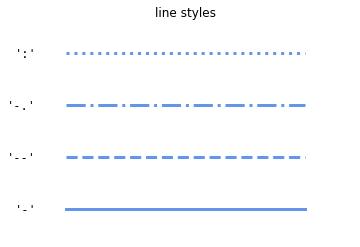

In [2]:
"""
Reference for line-styles included with Matplotlib (http://matplotlib.org/)
"""
import numpy as np
import matplotlib.pyplot as plt


color = 'cornflowerblue'
points = np.ones(5)  # Draw 5 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontdict={'family': 'monospace'})


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()


def nice_repr(text):
    return repr(text).lstrip('u')


# Plot all line styles.
f, ax = plt.subplots()

linestyles = ['-', '--', '-.', ':']
for y, linestyle in enumerate(linestyles):
    ax.text(-0.5, y, nice_repr(linestyle), **text_style)
    ax.plot(y * points, linestyle=linestyle, color=color, linewidth=3)
    format_axes(ax)
    ax.set_title('line styles')

plt.show()


### Color

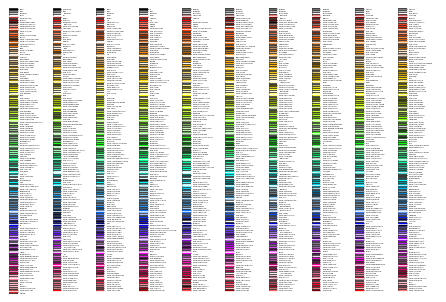

In [3]:
"""
Visualization of named colors (http://matplotlib.org/)

Simple plot example with the named colors and its visual representation.
"""

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import six

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors


colors_ = list(six.iteritems(colors.cnames))

# Add the single letter colors.
for name, rgb in six.iteritems(colors.ColorConverter.colors):
    hex_ = colors.rgb2hex(rgb)
    colors_.append((name, hex_))

# Transform to hex color values.
hex_ = [color[1] for color in colors_]
# Get the rgb equivalent.
rgb = [colors.hex2color(color) for color in hex_]
# Get the hsv equivalent.
hsv = [colors.rgb_to_hsv(color) for color in rgb]

# Split the hsv values to sort.
hue = [color[0] for color in hsv]
sat = [color[1] for color in hsv]
val = [color[2] for color in hsv]

# Sort by hue, saturation and value.
ind = np.lexsort((val, sat, hue))
sorted_colors = [colors_[i] for i in ind]

n = len(sorted_colors)
ncols = 10
nrows = int(np.ceil(1. * n / ncols))

fig, ax = plt.subplots()

X, Y = fig.get_dpi() * fig.get_size_inches()

# row height
h = Y / (nrows + 1)
# col width
w = X / ncols

for i, (name, color) in enumerate(sorted_colors):
    col = i % ncols
    row = int(i / ncols)
    y = Y - (row * h) - h
    
    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    # Add extra black line a little bit thicker to make
    # clear colors more visible.
    ax.hlines(y, xi_line, xf_line, color='black', linewidth=(h * 0.7))
    ax.hlines(y + h * 0.1, xi_line, xf_line, color=color, linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.savefig("colors.pdf")
plt.show()


### Markers

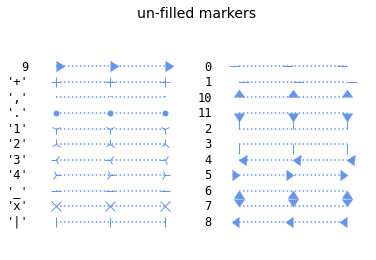

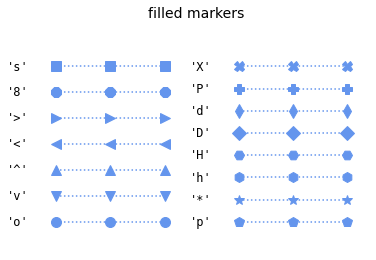

In [4]:
"""
Reference for filled- and unfilled-marker types included with Matplotlib.
"""
from six import iteritems
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


points = np.ones(3)  # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(linestyle=':', color='cornflowerblue', markersize=10)


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()


def nice_repr(text):
    return repr(text).lstrip('u')


def split_list(a_list):
    i_half = len(a_list) // 2
    return (a_list[:i_half], a_list[i_half:])


# Plot all un-filled markers
# --------------------------

fig, axes = plt.subplots(ncols=2)

# Filter out filled markers and marker settings that do nothing.
# We use iteritems from six to make sure that we get an iterator
# in both python 2 and 3
unfilled_markers = [m for m, func in iteritems(Line2D.markers)
                    if func != 'nothing' and m not in Line2D.filled_markers]
# Reverse-sort for pretty. We use our own sort key which is essentially
# a python3 compatible reimplementation of python2 sort.
unfilled_markers = sorted(unfilled_markers,
                          key=lambda x: (str(type(x)), str(x)))[::-1]
for ax, markers in zip(axes, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y * points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('un-filled markers', fontsize=14)


# Plot all filled markers.
# ------------------------

fig, axes = plt.subplots(ncols=2)
for ax, markers in zip(axes, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y * points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('filled markers', fontsize=14)

plt.show()


### Plots and Subplots

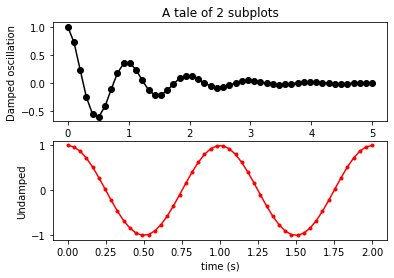

In [5]:
"""
Simple demo with multiple subplots.
"""
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
#plt.plot(x1, y1, 'ko-')
plt.plot(x1, y1, color='black', marker='o')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()


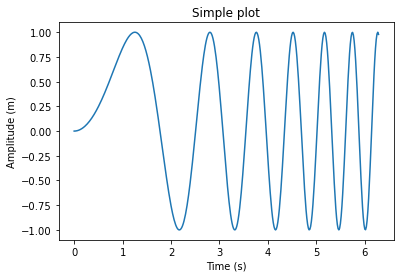

In [6]:
"""Examples illustrating the use of plt.subplots().

This function creates a figure and a grid of subplots with a single call, while
providing reasonable control over how the individual plots are created.  For
very refined tuning of subplot creation, you can still use add_subplot()
directly on a new figure.
"""

import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')

# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (m)')
plt.show()


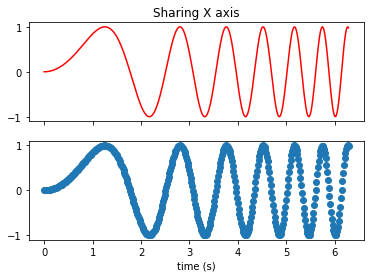

In [7]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y,'r')
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)
axarr[1].set_xlabel('time (s)')
plt.show()

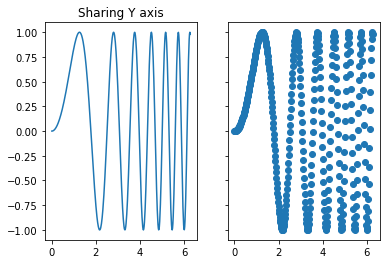

In [8]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

plt.show()


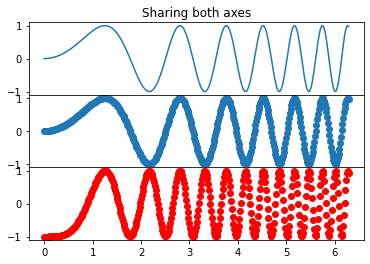

In [9]:
# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

plt.show()

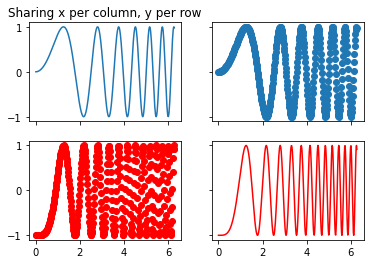

In [10]:
# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')

plt.show()

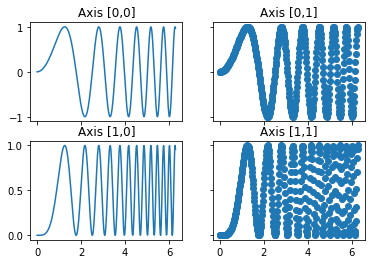

In [11]:
# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

plt.show()

## Histograms

This will be used extensively in a week when we do statistics

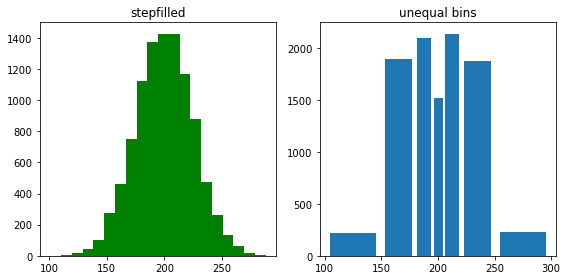

In [14]:
"""
Demo of the histogram (hist) function with different ``histtype`` settings.

* Histogram with step curve that has a color fill.
* Histogram with with unequal bin widths.

"""
import numpy as np
import matplotlib.pyplot as plt


mu = 200
sigma = 25
x = mu + sigma*np.random.randn(10000)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))

ax0.hist(x, 20, histtype='stepfilled', facecolor='g')
ax0.set_title('stepfilled')

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
ax1.hist(x, bins, histtype='bar', rwidth=0.8)
ax1.set_title('unequal bins')

plt.tight_layout()
plt.show()


## Just for fun...
### 3D Plotting

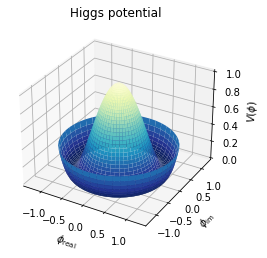

In [15]:
# By Armin Moser

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
step = 0.04
maxval = 1.0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create supporting points in polar coordinates
r = np.linspace(0,1.25,50)
p = np.linspace(0,2*np.pi,50)
R,P = np.meshgrid(r,p)
# transform them to cartesian system
X,Y = R*np.cos(P),R*np.sin(P)

Z = ((R**2 - 1)**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu_r)
ax.set_zlim3d(0, 1)
ax.set_title('Higgs potential')
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')
plt.show()


Remember if you ever need more information, google is a coders best friend. Any problem you're having someone else has likely had and already asked about.